In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import pickle


In [69]:
# Generate WCSS plot
def plot_wcss(data):
    wcss = []

    # trying kemans for k = 1 to k = 10
    for k in range (1,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    sns.set(style='darkgrid')
    sns.lineplot(x=range(1,10), y=wcss)
    plt.title('Optimal No. of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show(block=True)    

In [73]:
# Plot clusters
def plot_cluster(X, clusters):
    sns.set(style='darkgrid')

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # column indices of the features
    accuracy, login_streak, quiz_time_taken, quiz_word_learnt = 0, 1, 2, 3

    # plot clustering results
    for i in np.unique(clusters):
        cluster_name = 'Cluster ' + str(i+1)

        # returns an array of bool (True / False)
        bool_arr = (clusters == i)

        acc = X[bool_arr, accuracy]
        lis = X[bool_arr, login_streak]
        qtt = X[bool_arr, quiz_time_taken]
        qwl = X[bool_arr, quiz_word_learnt]

        sns.scatterplot(x=acc, y = lis, label=cluster_name, ax=ax[0,0])

        sns.scatterplot(x=qtt, y = qwl, label=cluster_name, ax=ax[0,1])

        sns.scatterplot(x=acc, y = qtt, label=cluster_name, ax=ax[1,0])

        sns.scatterplot(x=lis, y = qwl, label=cluster_name, ax=ax[1,1])
    
    # set labels and titles
    ax[0,0].set_xlabel('Accuracy')
    ax[0,0].set_ylabel('Login Streak')

    ax[0,1].set_xlabel('Time Taken')
    ax[0,1].set_ylabel('Words Learnt')

    ax[1,0].set_xlabel('Accuracy')
    ax[1,0].set_ylabel('Time Taken')

    ax[1,1].set_xlabel('Login Streak')
    ax[1,1].set_ylabel('Words Learnt')

    plt.tight_layout(pad=3)

    fig.suptitle(t='Clustering Results')
    plt.show(block=True)

    


# Find WCSS

c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

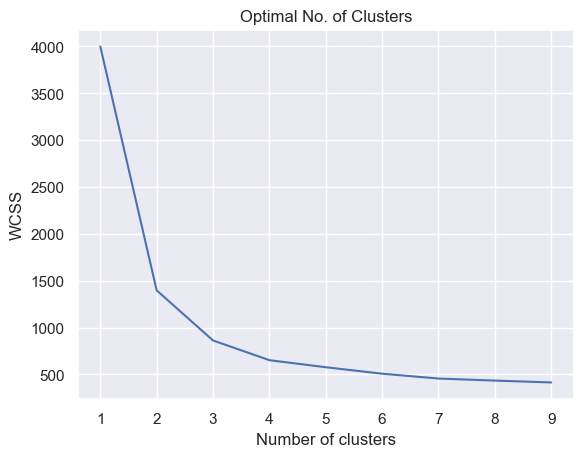

In [70]:
# Get data
df = pd.read_csv('dummy_v2.csv')

df.drop(['learner_type'], axis=1, inplace=True)
# print(df)

data = df.values # data converted to numpy array

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

plot_wcss(scaled_data) # 4 is the optimal cluster


c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diank\.conda\envs\mlaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


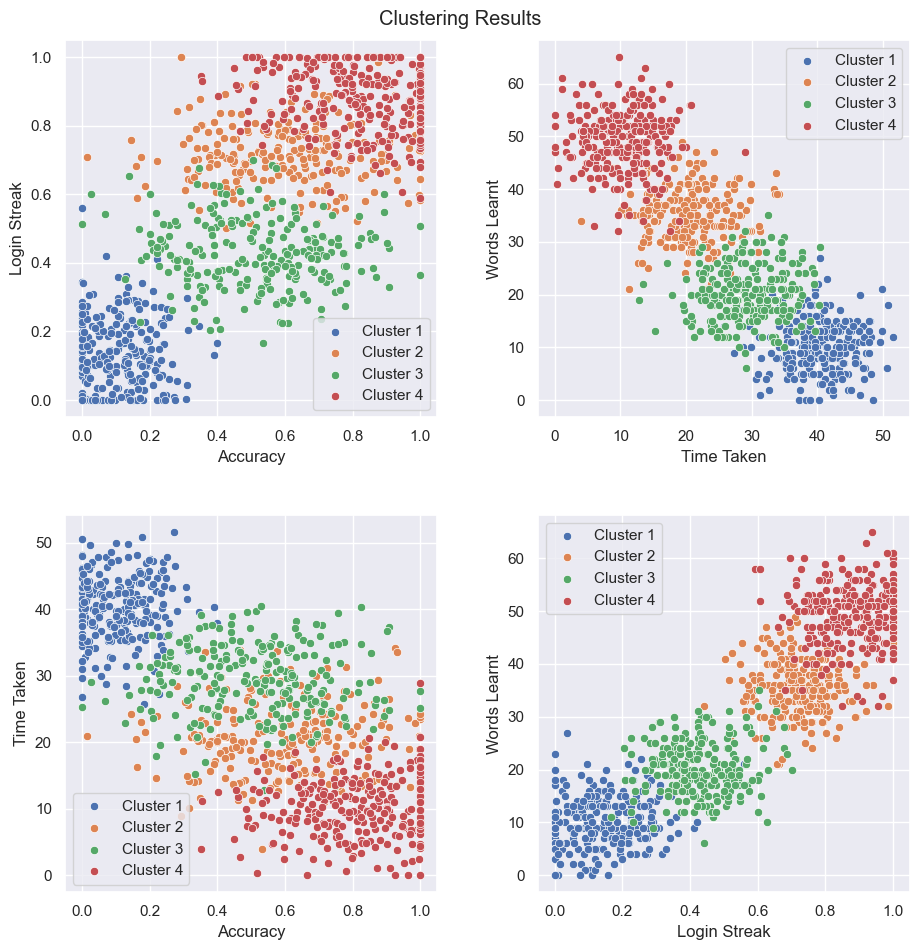

     accuracy  login_streak  quiz_time_taken  quiz_word_learnt  Cluster
0    0.608410      0.794614        14.305635                35  Average
1    0.010325      0.095592        43.772072                10     Poor
2    0.487366      0.809188         7.358682                56     Good
3    0.684194      0.821531         9.010260                40     Good
4    1.000000      0.849435        17.487926                32     Good
..        ...           ...              ...               ...      ...
995  0.713643      0.867283        12.208963                51     Good
996  0.317415      0.855550        10.102772                36  Average
997  1.000000      0.925150        12.971527                51     Good
998  0.081222      0.143300        40.397311                13     Poor
999  0.251592      0.264155        47.849786                13     Poor

[1000 rows x 5 columns]


In [81]:
# Get data
df = pd.read_csv('dummy_v2.csv')

df.drop(['learner_type'], axis=1, inplace=True)
# print(df)

data = df.values # data converted to numpy array

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

algo = KMeans(n_clusters=4, random_state=42)
clusters = algo.fit_predict(scaled_data)

plot_cluster(data, clusters)

# convert numpy arry to dataframe
clusters_df = pd.DataFrame(clusters, columns=['Cluster'])

#label mapping
label_mapping = {0: 'Poor', 1: 'Average', 2: 'Beginner', 3: 'Good'}
clusters_df['Cluster'] = clusters_df['Cluster'].map(label_mapping)


# Append to dataframe
clustered_df = pd.concat([df, clusters_df], axis=1)

print(clustered_df)

Cluster 1 (0) = Poor
Cluster 2 (1) = Average
Cluster 3 (2) = Beginner
Cluster 4 (3) = Good

In [82]:
def knn (df):
    x_train = df.drop(['Cluster'], axis=1).values
    y_train = df['Cluster'].values
    
    knn = KNeighborsClassifier(n_neighbors=7)

    scaler = StandardScaler()
    scaler.fit(x_train)
    scaled_x_train = scaler.transform(x_train)

    knn.fit(scaled_x_train, y_train)

    return knn

In [88]:
# Call the knn function to train the model
trained_model = knn(clustered_df)

# New set of attributes
new_attributes = [[0.4, 1, 40, 50]]

# Standardize the new attributes using the same scaler
scaled_new_attributes = scaler.transform(new_attributes)

# Make predictions using the trained model
predictions = trained_model.predict(scaled_new_attributes)

# Print the predictions
print("Predicted cluster:", predictions)

Predicted cluster: ['Average']


In [80]:
og_df=pd.read_csv('dummy_v2.csv')
print(og_df)

    learner_type  accuracy  login_streak  quiz_time_taken  quiz_word_learnt
0        Average  0.608410      0.794614        14.305635                35
1           Poor  0.010325      0.095592        43.772072                10
2           Good  0.487366      0.809188         7.358682                56
3           Good  0.684194      0.821531         9.010260                40
4        Average  1.000000      0.849435        17.487926                32
..           ...       ...           ...              ...               ...
995         Good  0.713643      0.867283        12.208963                51
996      Average  0.317415      0.855550        10.102772                36
997         Good  1.000000      0.925150        12.971527                51
998         Poor  0.081222      0.143300        40.397311                13
999         Poor  0.251592      0.264155        47.849786                13

[1000 rows x 5 columns]
